# Un polynôme résoluble par radicaux 

On pose $P(X) = X^5 - 5 X+ 12 \in \mathbb Q [X] $ 

On veut savoir s'il est résoluble par radicaux.

In [1]:
import networkx as nx

In [2]:
#Objets qui vont nous servir
PRQ.<X> = PolynomialRing(QQ)
PRR.<Y> = PolynomialRing(RR)
var('x') #pour les affichages

x

### Affichage de la courbe

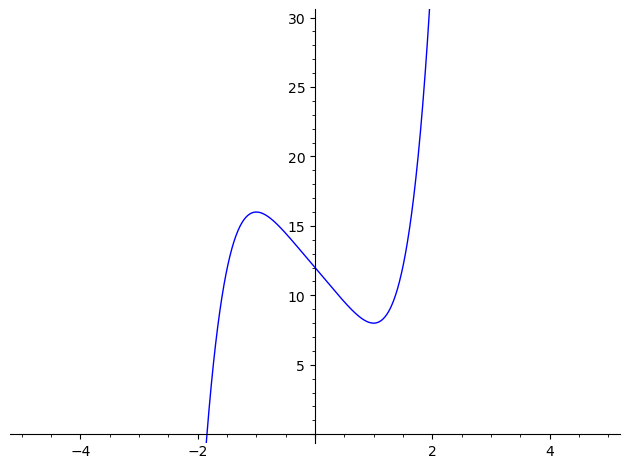

In [3]:
P_exp = x^5 - 5*x + 12

plot(P_exp, (x,-5,5),
    ymin=0,ymax=30)

Ce polynôme semble avoir une seule racine réelle.

### Irréductibilité et racines réelles du polynôme :

In [4]:
P = X^5 - 5*X + 12
P.factor()

X^5 - 5*X + 12

In [5]:
P.is_irreducible()

True

Il est bien irréductible dans $\mathbb Q[X]$

In [6]:
Pr = Y^5 - 5*Y + 12 
Pr.roots()

[(-1.84208596619025, 1)]

Elle admet bien une seule racine réelle de multiplicité 1, et donc deux paires de racines complexes conjuguées.

### Application de la théorie de Galois sur ce polynôme :

On va calculer le corps de décomposition $\frac{\mathbb Q[X]}{(P)_{id}}$.On sait que c'est un corps car $P$ est irréductible.

In [7]:
K.<alpha> = NumberField(P)
K

Number Field in alpha with defining polynomial X^5 - 5*X + 12

In [14]:
souscorps = K.subfields()
for corps in souscorps:
    print(corps)

(Number Field in alpha0 with defining polynomial X, Ring morphism:
  From: Number Field in alpha0 with defining polynomial X
  To:   Number Field in alpha with defining polynomial X^5 - 5*X + 12
  Defn: 0 |--> 0, None)
(Number Field in alpha1 with defining polynomial X^5 - 5*X + 12, Ring morphism:
  From: Number Field in alpha1 with defining polynomial X^5 - 5*X + 12
  To:   Number Field in alpha with defining polynomial X^5 - 5*X + 12
  Defn: alpha1 |--> alpha, Ring morphism:
  From: Number Field in alpha with defining polynomial X^5 - 5*X + 12
  To:   Number Field in alpha1 with defining polynomial X^5 - 5*X + 12
  Defn: alpha |--> alpha1)


On calcule maintenant le groupe de Galois :

In [21]:
G = K.galois_group()
G

Galois group 5T2 (5:2) with order 10 of X^5 - 5*X + 12

C'est un groupe de cardinal 10 ! on sait qu'il est résoluble.

In [22]:
list_elem = G.list() #On extrait la liste des éléments du groupe de Galois

On va maintenant construire puis dessiner le graphe du groupe de Galois de ce polynôme :

In [23]:
graphe = nx.Graph()
for elem in list_elem:
    graphe.add_node(elem)
for i in range(len(list_elem)):
    for j in range(i+1,len(list_elem)):
        graphe.add_edge(list_elem[i],list_elem[j])

On dessine le graphe

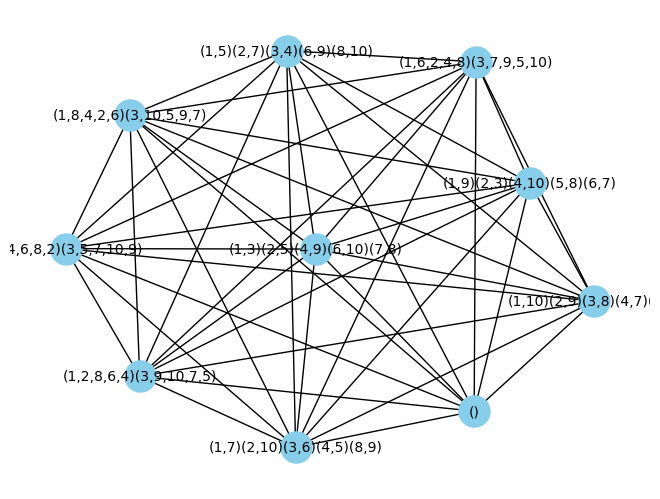

In [25]:
pos = nx.spring_layout(graphe)  # Position des nœuds
nx.draw(graphe, pos, with_labels=True, node_size=500, node_color='skyblue', 
        font_size=10, font_color='black')
show()

##### On va maintenant construire le graphe des sous groupes du Groupe de galois de ce polynôme

In [27]:
sousgroupes = G.subgroups() 

In [28]:
graphe = nx.Graph()   
#On réinitialise notre graphe, qu'on avait utilisé pour representer le groupe de Galois

In [29]:
for groupe in sousgroupes:
    generateurs = groupe.gens()
    if groupe==sousgroupes[0]:
        label='identité'
    elif groupe==G:
        label='Groupe de Galois'
    else :
        label=','.join([str(gen) for gen in generateurs])
    graphe.add_node(groupe,label=label)

for i in range(len(sousgroupes)):
    for j in range(i+1, len(sousgroupes)):
        if sousgroupes[i].is_subgroup(sousgroupes[j]):
            graphe.add_edge(sousgroupes[i],sousgroupes[j])

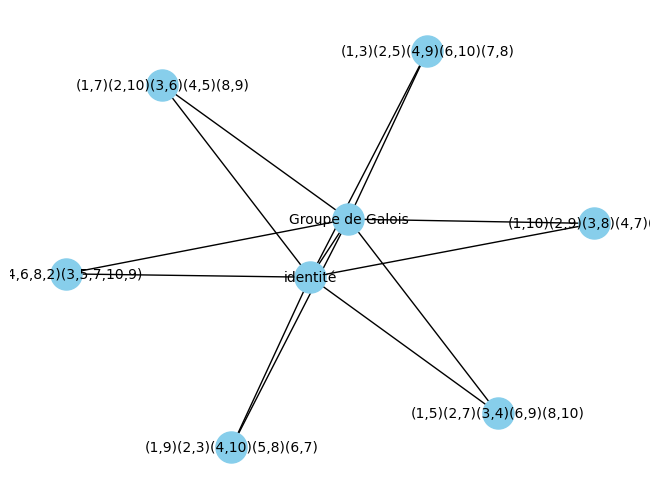

In [31]:
pos = nx.spring_layout(graphe)

labels = {node: data['label'] for node, data in graphe.nodes(data=True)}
nx.draw(graphe, pos, with_labels=False, node_size=500, node_color='skyblue', font_size=10, font_color='black', arrows=True)
nx.draw_networkx_labels(graphe, pos, labels=labels, font_size=10, font_color='black')
show()